In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = "Arial"
df = pd.read_table("../nr_metal_sites.tsv")

### distribution of metal type

In [2]:
metal_resi_names = set(df['metal_resi'])
print(metal_resi_names)

{'NI', 'CO', 'CUA', 'CU1', 'CU', 'UNL', 'F3S', 'FE2', 'FE', 'ZN', 'MN', 'MN3', 'MG', 'SF4', 'FES', 'CA'}


In [3]:
# after manully check, UNL belongs to ZN
name2type_extra = {"MN3": "MN", "CUA": "CU", "CU1": "CU", "UNL": "ZN", "FE2": "FE"} 
metal_sites = set(zip(df['pdb'], df['metal_chain'], df['metal_resi'], df['metal_pdb_seq_num']))
metal2num = dict()
for i in metal_sites:
    _, _, resi, _ = i
    if resi in name2type_extra.keys():
        resi = name2type_extra[resi]
    if resi in metal2num.keys():
        metal2num[resi] += 1
    else:
        metal2num[resi] = 1
data = list(metal2num.items())
data.sort(key=lambda x: x[1], reverse=True)
x = [i[0] for i in data]
y = [i[1] for i in data]

Text(0, 0.5, 'Site number')

Text(0.5, 0, 'Metal type')

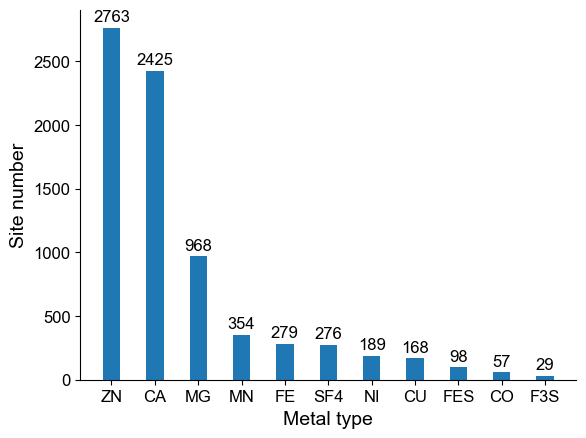

In [5]:
plt.ylabel("Site number", fontsize=14)
plt.xlabel("Metal type", fontsize=14)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for t in ax.get_yticklabels():
    t.set_fontsize(12)
for t in ax.get_xticklabels():
    t.set_fontsize(12)
rects = plt.bar(x, y, width=0.4)
for rect in rects:
    height = rect.get_height()
    text = plt.text(rect.get_x() + rect.get_width() / 2, height + 50, str(height), ha="center")
    text.set_fontsize(12)
plt.savefig("./fig/distribution_metal_type.pdf", bbox_inches="tight")

### distribution of metal-binding residue type

In [6]:
metal_binding_residues = set(zip(df['pdb'], df['resi_chain'], df['resi_ndb_seq_num'], df['resi']))
resi2num = dict()
for r in metal_binding_residues:
    _, _, _, resi = r
    if resi in resi2num.keys():
        resi2num[resi] += 1
    else:
        resi2num[resi] = 1
print(resi2num)

{'Asp': 6195, 'Ile': 284, 'His': 5090, 'Gly': 730, 'Tyr': 340, 'Cys': 7052, 'Glu': 3182, 'Asn': 1282, 'Val': 420, 'Ser': 644, 'Gln': 470, 'Lys': 323, 'Met': 157, 'Thr': 584, 'Pro': 143, 'Leu': 370, 'Phe': 195, 'Ala': 352, 'Arg': 231, 'Trp': 84}


In [7]:
CHED_three_letters = {"Cys": "Cysteine", "His": "Histidine", "Glu": "Glutamic acid", "Asp": "Aspartic acid"}
resi2num_simple = dict()
resi2num_simple["Others"] = 0
for k, v in resi2num.items():
    if k not in CHED_three_letters.keys():
        k = "Others"
        resi2num_simple[k] += v
    else:
        resi2num_simple[CHED_three_letters[k]] = v
data = list(resi2num_simple.items())
data.sort(key=lambda x: x[1], reverse=True)
x = [i[0] for i in data]
y = [i[1] for i in data]

Text(0.5, -0.1, 'Total = 28128')

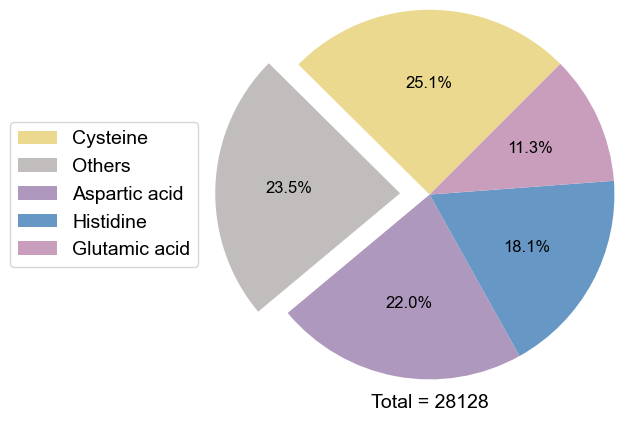

In [8]:
patches= plt.pie(
    y,
    colors=['#EAD98F', '#C0BDBC', '#AF98BE', '#6797C4', '#C99EBD'],
    explode=[0, 0.2, 0, 0, 0],
    startangle=45,
    radius=1.25,
    autopct="%.1f%%",
)
for text in patches[2]:
    text.set_fontsize(12)
plt.legend(
    x, 
    bbox_to_anchor=(-0.1, 0.5), 
    loc='center right', 
    fontsize=14
)
plt.title(
    f"Total = {sum(y)}",
    loc="center",
    y=-0.1,
    fontsize=14
)
plt.savefig("./fig/distribution_metal_binding_resi_type.pdf", bbox_inches="tight")

### distribution of atom-metal distance

Text(0, 0.5, 'Density')

Text(0.5, 0, 'Distance (Å)')

/tmp/ipykernel_19766/794037532.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(distances, hist=True, kde=True)


<Axes: xlabel='Distance (Å)', ylabel='Density'>

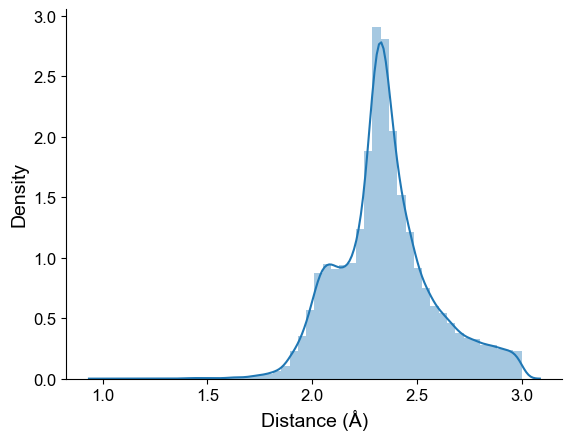

In [9]:
distances = list(df['distance'])
plt.ylabel("Density", fontsize=14)
plt.xlabel("Distance (Å)", fontsize=14)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for t in ax.get_yticklabels():
    t.set_fontsize(12)
for t in ax.get_xticklabels():
    t.set_fontsize(12)
sns.distplot(distances, hist=True, kde=True)
plt.savefig("./fig/distribution_atom-metal_distance.pdf", bbox_inches="tight", dpi=300)

### distribution of metal-binding chain num

In [10]:
num_chain2count = dict()
for metal_site, df_site in df.groupby(['pdb', 'metal_chain', 'metal_pdb_seq_num', 'metal_resi']):
    set_chain = set(df_site['resi_chain'])
    num_chain = len(set_chain)
    
    if num_chain not in num_chain2count.keys():
        num_chain2count[num_chain] = 1
    else:
        num_chain2count[num_chain] += 1
data = list(num_chain2count.items())
data.sort(key=lambda x: x[1], reverse=True)
x = [i[0] for i in data]
y = [i[1] for i in data]

Text(0, 0.5, 'Site number')

Text(0.5, 0, 'Number of interacted chains')

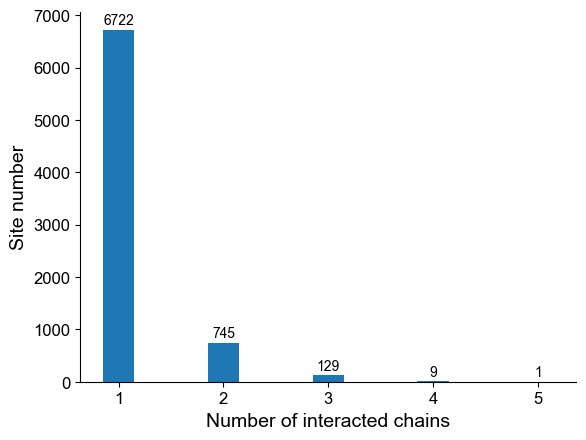

In [11]:
plt.ylabel("Site number", fontsize=14)
plt.xlabel("Number of interacted chains", fontsize=14)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for t in ax.get_yticklabels():
    t.set_fontsize(12)
for t in ax.get_xticklabels():
    t.set_fontsize(12)
rects = plt.bar(x, y, width=0.3)
for rect in rects:
    height = rect.get_height()
    text = plt.text(rect.get_x() + rect.get_width() / 2, height + 100, str(height), ha="center")
    t.set_fontsize(12)
plt.savefig("./fig/distribution_metal_binding_chain_num.pdf", bbox_inches="tight")

### distribution of main-chain involved sites

In [12]:
interacted_type2num = dict()
interacted_type2num["without main-chain interacted"] = 0
interacted_type2num["with main-chain interacted"] = 0


main_chain_atom_names = {'CA', 'O', 'N', 'C', 'OXT'}
for metal_site, df_site in df.groupby(['pdb', 'metal_chain', 'metal_pdb_seq_num', 'metal_resi']):
    atoms = set(df_site['atom'])
    if len(atoms & main_chain_atom_names) != 0:
        interacted_type2num["with main-chain interacted"] += 1
    else: interacted_type2num["without main-chain interacted"] += 1
    
x = interacted_type2num.keys()
y = interacted_type2num.values()

Text(0.5, -0.1, 'Total = 7606')

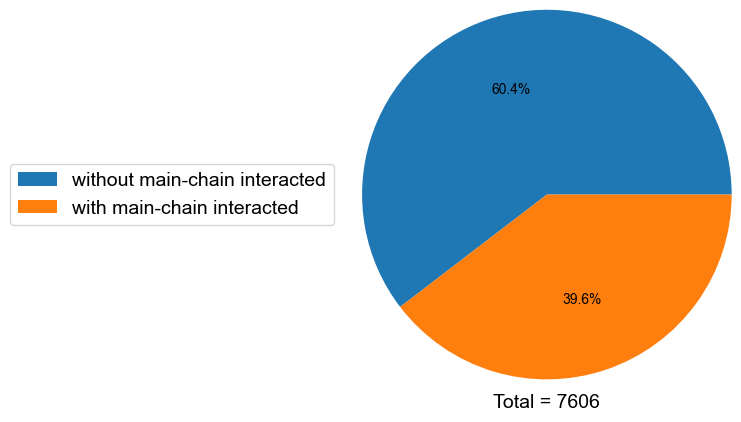

In [13]:
patches= plt.pie(
    y,
    radius=1.25,
    autopct="%.1f%%",
)
for text in patches[2]:
    t.set_fontsize(12)
plt.legend(
    x, 
    bbox_to_anchor=(-0.05, 0.5), 
    loc='center right', 
    fontsize=14
)
plt.title(
    f"Total = {sum(y)}",
    loc="center",
    y=-0.1,
    fontsize=14
)
plt.savefig("./fig/distribution_main-chain_involved_metal.pdf", bbox_inches="tight")

### distribution of atom-atom (N, O, S) distance

In [14]:
import sys

sys.path.append("../scripts/utils/")
from io_utils import parse_mmcif_file
from itertools import combinations

df_pdb_files = pd.read_table("~/database/pdb/rcsb_20230430/all_protein_files.csv")
pdb_to_files = dict(zip(df_pdb_files['pdb'], df_pdb_files['pdb_file']))

distances = []
for pdb, df_pdb in df.groupby(['pdb']):
    pdb_file = pdb_to_files[pdb]
    
    resi_id_to_resi = dict()
    struct, _ = parse_mmcif_file(pdb, pdb_file)
    chains = set(df_pdb['resi_chain'])
    for c in next(struct.get_models()).get_chains():
        if c.id in chains:
            for r in c.get_residues():
                resi_id_to_resi[r.get_full_id()] = r
    
    for site, df_site in df_pdb.groupby(['metal_chain', 'metal_pdb_seq_num']):
        atoms = []
        for _, row in df_site.iterrows():
            resi_id = (pdb, 0, row['resi_chain'], (" ", row['resi_pdb_seq_num'], row['resi_pdb_ins_code']))
            atom_id = row['atom']
            atoms.append(resi_id_to_resi[resi_id][atom_id])
        for a1, a2 in combinations(atoms, 2):
            distances.append(a1 - a2)

import numpy as np
np.max(distances)
# one core: one hour

/tmp/ipykernel_19766/2082976571.py:11: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for pdb, df_pdb in df.groupby(['pdb']):


8.17719

Text(0, 0.5, 'Density')

Text(0.5, 0, 'Distance (Å)')

/tmp/ipykernel_19766/4119403469.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(distances, hist=True, kde=True)


<Axes: xlabel='Distance (Å)', ylabel='Density'>

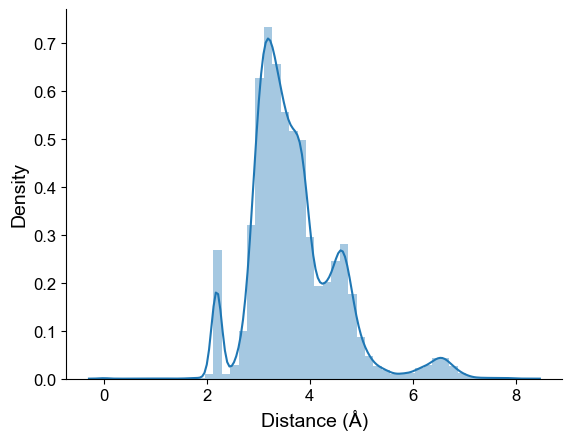

In [15]:
plt.ylabel("Density", fontsize=14)
plt.xlabel("Distance (Å)", fontsize=14)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for t in ax.get_yticklabels():
    t.set_fontsize(12)
for t in ax.get_xticklabels():
    t.set_fontsize(12)
sns.distplot(distances, hist=True, kde=True)
plt.savefig("./fig/distribution_atom-atom_distance.pdf", bbox_inches="tight")

### distribution of binding resi num

In [16]:
num_to_count = dict()
for site, df_site in df.groupby(['pdb', 'metal_chain', 'metal_pdb_seq_num']):
    num_binding_residues = len(set(zip(df_site['resi_chain'], df_site['resi_pdb_seq_num'])))
    if num_binding_residues in num_to_count.keys():
        num_to_count[num_binding_residues] += 1
    else: num_to_count[num_binding_residues] = 1

Text(0, 0.5, 'Site number')

Text(0.5, 0, 'Number of binding residues per site')

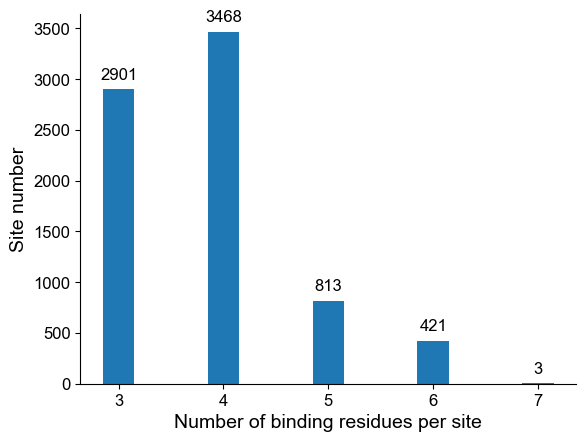

In [17]:
x = num_to_count.keys()
y = num_to_count.values()

plt.ylabel("Site number", fontsize=14)
plt.xlabel("Number of binding residues per site", fontsize=14)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for t in ax.get_yticklabels():
    t.set_fontsize(12)
for t in ax.get_xticklabels():
    t.set_fontsize(12)
rects = plt.bar(x, y, width=0.3)
for rect in rects:
    height = rect.get_height()
    text = plt.text(rect.get_x() + rect.get_width() / 2, height + 100, str(height), ha="center")
    text.set_fontsize(12)
plt.savefig("./fig/distribution_metal_binding_resi_num.pdf", bbox_inches="tight")

### ratio of resi type of different metal type

In [18]:
metal_types = {'ZN', 'CA', 'MG', 'MN', 'FE', 'CU', 'NI', 'CO', 'SF4', 'FES', 'F3S'}
metal_type2resi_type_num = dict()
for metal_type in metal_types:
    metal_type2resi_type_num[metal_type] = dict()

ched = {"Cys", "His", "Asp", "Glu"}
name2type_extra = {"MN3": "MN", "CUA": "CU", "CU1": "CU", "UNL": "ZN", "FE2": "FE"}

metal_binding_residues = set(zip(df['pdb'], df['metal_chain'], df['metal_resi'], df['metal_pdb_seq_num'], df['resi'], df['resi_ndb_seq_can_num']))
for i in metal_binding_residues:
    _, _, metal_resi, _, resi, _  = i
    if metal_resi in name2type_extra.keys(): metal_resi = name2type_extra[metal_resi]
    if resi not in ched: resi = "Others"
    
    if resi in metal_type2resi_type_num[metal_resi].keys():
        metal_type2resi_type_num[metal_resi][resi] += 1
    else:
        metal_type2resi_type_num[metal_resi][resi] = 1
        
metal_type2resi_type_ratio = dict()
for metal, v in metal_type2resi_type_num.items():
    total = sum(v.values())
    metal_type2resi_type_ratio[metal] = dict()
    for resi, num in v.items():
        metal_type2resi_type_ratio[metal][resi] = num / total
        
metal_type2resi_type_ratio

{'NI': {'His': 0.5959933222036727,
  'Asp': 0.12520868113522537,
  'Glu': 0.1001669449081803,
  'Others': 0.1318864774624374,
  'Cys': 0.04674457429048414},
 'CO': {'His': 0.43783783783783786,
  'Asp': 0.20540540540540542,
  'Cys': 0.032432432432432434,
  'Others': 0.13513513513513514,
  'Glu': 0.1891891891891892},
 'F3S': {'Cys': 0.9886363636363636, 'Others': 0.011363636363636364},
 'SF4': {'Cys': 0.9701770736253494,
  'His': 0.013979496738117428,
  'Others': 0.007455731593662628,
  'Glu': 0.004659832246039142,
  'Asp': 0.003727865796831314},
 'FE': {'His': 0.4592901878914405,
  'Glu': 0.24634655532359082,
  'Asp': 0.1440501043841336,
  'Cys': 0.08559498956158663,
  'Others': 0.06471816283924843},
 'ZN': {'Cys': 0.5299584734032035,
  'His': 0.28870872058532726,
  'Glu': 0.06832113901522642,
  'Asp': 0.0871069804231758,
  'Others': 0.025904686573067034},
 'MN': {'His': 0.31685575364667745,
  'Asp': 0.3606158833063209,
  'Glu': 0.20745542949756887,
  'Others': 0.10615883306320907,
  'Cy

In [19]:
x = sorted(list(metal_types))
y_keys = ['Cys', 'His', 'Glu', 'Asp', 'Others']
key_to_color = dict(zip(y_keys, ['#EAD98F', '#6797C4', '#C99EBD', '#AF98BE', '#C0BDBC']))
y_key_to_ratio_list = dict()

for k in y_keys:
    y_key_to_ratio_list[k] = []
    for metal in x:
        if k not in metal_type2resi_type_ratio[metal].keys():
            y_key_to_ratio_list[k].append(0)
        else: y_key_to_ratio_list[k].append(metal_type2resi_type_ratio[metal][k])

Text(0, 0.5, 'Ratio of coordinated residue type')

Text(0.5, 0, 'Metal type')

<BarContainer object of 11 artists>

<BarContainer object of 11 artists>

<BarContainer object of 11 artists>

<BarContainer object of 11 artists>

<BarContainer object of 11 artists>

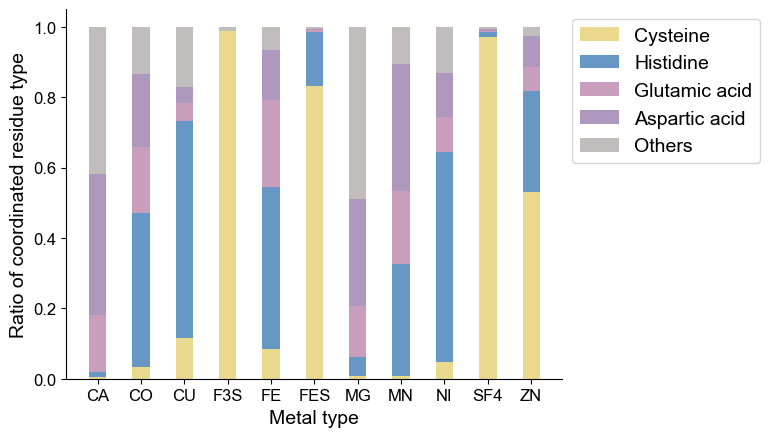

In [20]:
import numpy as np

plt.ylabel("Ratio of coordinated residue type", fontsize=14)
plt.xlabel("Metal type", fontsize=14)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for t in ax.get_yticklabels():
    t.set_fontsize(12)
for t in ax.get_xticklabels():
    t.set_fontsize(12)

coor_x = np.arange(len(x))
_ = plt.xticks(coor_x, labels=x)
width = 0.4

for i in range(len(y_keys)):
    key = y_keys[i]
    color = key_to_color[key]
    cur = y_key_to_ratio_list[key]
    if i == 0:
        plt.bar(coor_x, cur, width=width, color=color)
    else:
        prevs = [y_key_to_ratio_list[y_keys[j]] for j in range(i)]
        prev = np.sum(prevs, axis=0)
        plt.bar(coor_x, cur, width=width, bottom=prev, color=color)
        
items = {"Cys": "Cysteine", "His": "Histidine", "Glu": "Glutamic acid", "Asp": "Aspartic acid", "Others": "Others"}
legend_labels = []
for k in y_keys:
    legend_labels.append(items[k])
plt.legend(
    legend_labels, 
    bbox_to_anchor=(1,1), 
    loc='upper left', 
    fontsize=14
)
plt.savefig("./fig/ratio_metal_type_to_resi_type.pdf", bbox_inches="tight")

### distribution of distances of backbone atoms (N, CA, CB, O, C) in all metal-binding sites

In [2]:
import sys
from itertools import combinations, product

import pandas as pd
from Bio.PDB.Residue import Residue

sys.path.append("../scripts/utils/")
from io_utils import parse_mmcif_file

df_pdb_files = pd.read_table("~/database/pdb/rcsb_20230430/all_protein_files.csv")
pdb_to_files = dict(zip(df_pdb_files['pdb'], df_pdb_files['pdb_file']))

bb_atom_pair_to_distance = dict()
atom_types = ['C', 'CA', 'CB', 'O', 'N'] # to simplify, OXT not included
for a1, a2 in product(atom_types, atom_types):
    mode = (a1, a2)
    bb_atom_pair_to_distance[mode] = []

In [3]:
for pdb, df_pdb in df.groupby(['pdb']):
    pdb_file = pdb_to_files[pdb]
    
    resi_id_to_resi = dict()
    struct, _ = parse_mmcif_file(pdb, pdb_file)
    chains = set(df_pdb['resi_chain'])
    for c in next(struct.get_models()).get_chains():
        if c.id in chains:
            for r in c.get_residues():
                resi_id_to_resi[r.get_full_id()] = r
    
    for site, df_site in df_pdb.groupby(['metal_chain', 'metal_pdb_seq_num']):

        resi_ids = set()
        for _, row in df_site.iterrows():
            resi_id = (pdb, 0, row['resi_chain'], (" ", row['resi_pdb_seq_num'], row['resi_pdb_ins_code']))
            resi_ids.add(resi_id)

        for id1, id2 in combinations(resi_ids, 2):
            r1: Residue = resi_id_to_resi[id1]
            r2: Residue = resi_id_to_resi[id2]

            for a1, a2 in product(atom_types, atom_types):
                try:
                    d = r1[a1] - r2[a2]
                except KeyError:
                    continue
                mode = (a1, a2)
                bb_atom_pair_to_distance[mode].append(d)

# half an hour

/tmp/ipykernel_18937/1203052047.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for pdb, df_pdb in df.groupby(['pdb']):


In [4]:
pairs = list(combinations(atom_types, 2)) + [(i, i) for i in atom_types]
bb_uniq_atom_pair_to_max_distance = dict()
for i in pairs:
    a1, a2 = i
    if a1 == a2: bb_uniq_atom_pair_to_max_distance[i] = max(bb_atom_pair_to_distance[i])
    else: bb_uniq_atom_pair_to_max_distance[i] = max(bb_atom_pair_to_distance[(a1, a2)] + bb_atom_pair_to_distance[(a2, a1)])
bb_uniq_atom_pair_to_max_distance

{('C', 'CA'): 17.356255,
 ('C', 'CB'): 16.440006,
 ('C', 'O'): 19.120956,
 ('C', 'N'): 17.945084,
 ('CA', 'CB'): 15.344998,
 ('CA', 'O'): 18.099466,
 ('CA', 'N'): 16.449877,
 ('CB', 'O'): 17.353592,
 ('CB', 'N'): 15.726173,
 ('O', 'N'): 18.635729,
 ('C', 'C'): 18.326189,
 ('CA', 'CA'): 15.884707,
 ('CB', 'CB'): 14.675517,
 ('O', 'O'): 19.63483,
 ('N', 'N'): 17.297102}